In [2]:
"""
Script to Explore Training Dataset
"""
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib
from matplotlib import patches
from utils import utils
import dataframe_image as dfi
from PIL import Image
from collections import defaultdict
# np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
font = {'family' : 'Ubuntu',
        'size'   : 22}
matplotlib.rc('font', **font)
import json
from datetime import datetime
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

EXP_TYPES = ['ASSEMBLESANDWICH', 'GETPLATE', 'OPENFREEZER', 'OPENFRIDGE', 'SLICETOMATO', 'WASHHANDS']
# ACTION_PERIOD = ['grab something', ]
tagId = "0x683f"
regions_fp = Path().joinpath("outputs", "REGIONS", "2023-03-14 12:15:31.794149.json")
data_fp = Path().joinpath("outputs", "TRAINING", "2023-03-28 14:24:55.279109_W2_S1_training.csv")
wild_fp = Path().joinpath("outputs", "TRAINING", "2023-03-28 11:34:01.626942_W2_S1_wild_training.csv")
data = pd.read_csv(data_fp)
wild_data = pd.read_csv(wild_fp)
# Include wild in training?
data = pd.concat([data, wild_data], axis=0)

In [9]:
# MARK: - Preprocessing
cleaned_data = (data
                .dropna()
                .reset_index(drop=True)
                .pipe(utils.one_hot_encode_col, 'LOCATION')
            )

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(cleaned_data['ACTIVITY'].values)
cleaned_data['ACTIVITY'] = encoded_y

joblib.dump(label_encoder, 'label_encoder.joblib')
display(cleaned_data)
categories = label_encoder.classes_
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

,MEAN_POS_X,MEAN_POS_Y,MEAN_POS_Z,MEAN_ACC_X,MEAN_ACC_Y,MEAN_ACC_Z,MEAN_LINACC_X,MEAN_LINACC_Y,MEAN_LINACC_Z,MEAN_GYRO_X,...,MIN_Heading,MIN_Roll,MIN_Pitch,MIN_Pressure,ACTIVITY,LOCATION_counter,LOCATION_dish_cabinet,LOCATION_fridge,LOCATION_kitchen_sink,LOCATION_undefined
0,8581.981667,2855.553182,729.431667,-596.166667,-371.800000,619.533333,11.366667,-34.566667,-27.266667,-7.643750,...,176.0625,-70.9375,15.1250,93066.00,0,1.0,0.0,0.0,0.0,0.0
1,8689.433333,2931.078333,770.276667,-715.200000,-132.000000,431.700000,41.733333,-29.233333,-37.300000,-5.479167,...,152.8125,-75.2500,-32.0000,93064.00,0,1.0,0.0,0.0,0.0,0.0
2,8812.311290,3036.893548,791.935484,-762.258065,154.000000,509.967742,-22.838710,-59.161290,-34.258065,4.877016,...,152.8125,-75.2500,-32.0000,93064.00,0,1.0,0.0,0.0,0.0,0.0
3,8741.198387,3079.341935,821.904839,-600.838710,-12.677419,627.354839,78.741935,-206.451613,-87.258065,-8.983871,...,151.2500,-51.5000,-37.0625,93067.00,0,1.0,0.0,0.0,0.0,0.0
4,8669.827586,3080.410345,841.681034,-612.896552,-177.344828,604.206897,114.448276,-143.862069,-74.137931,-11.125000,...,151.2500,-51.1875,-37.0625,93064.25,0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,8325.412500,4552.037500,787.751562,-152.625000,-948.031250,121.718750,42.468750,-4.718750,-5.375000,-9.353516,...,259.5000,-13.7500,78.0625,94709.75,5,0.0,0.0,0.0,0.0,1.0
4313,8164.317187,4546.332812,896.706250,-203.562500,-944.218750,119.093750,17.187500,4.187500,24.281250,-3.255859,...,250.1250,-14.5625,81.1875,94719.00,5,0.0,0.0,0.0,0.0,1.0
4314,8151.951515,4522.818182,944.425758,-224.303030,-939.939394,104.484848,6.121212,7.606061,11.454545,0.215909,...,244.2500,-14.5625,83.8750,94719.00,5,0.0,0.0,0.0,0.0,1.0
4315,8163.080303,4534.030303,938.684848,-218.848485,-940.393939,105.000000,3.393939,8.151515,3.666667,0.346591,...,238.3125,-13.6250,83.2500,94720.00,5,0.0,0.0,0.0,0.0,1.0


{'ASSEMBLESANDWICH': 0, 'GETPLATE': 1, 'OPENFREEZER': 2, 'OPENFRIDGE': 3, 'SLICETOMATO': 4, 'UNDEFINED': 5, 'WASHHANDS': 6}


Data Shape:  (4317, 101) (4317,)
Train Shape:  (2590, 101) (2590,)
Test Shape:  (1727, 101) (1727,)
0.9415170816444702


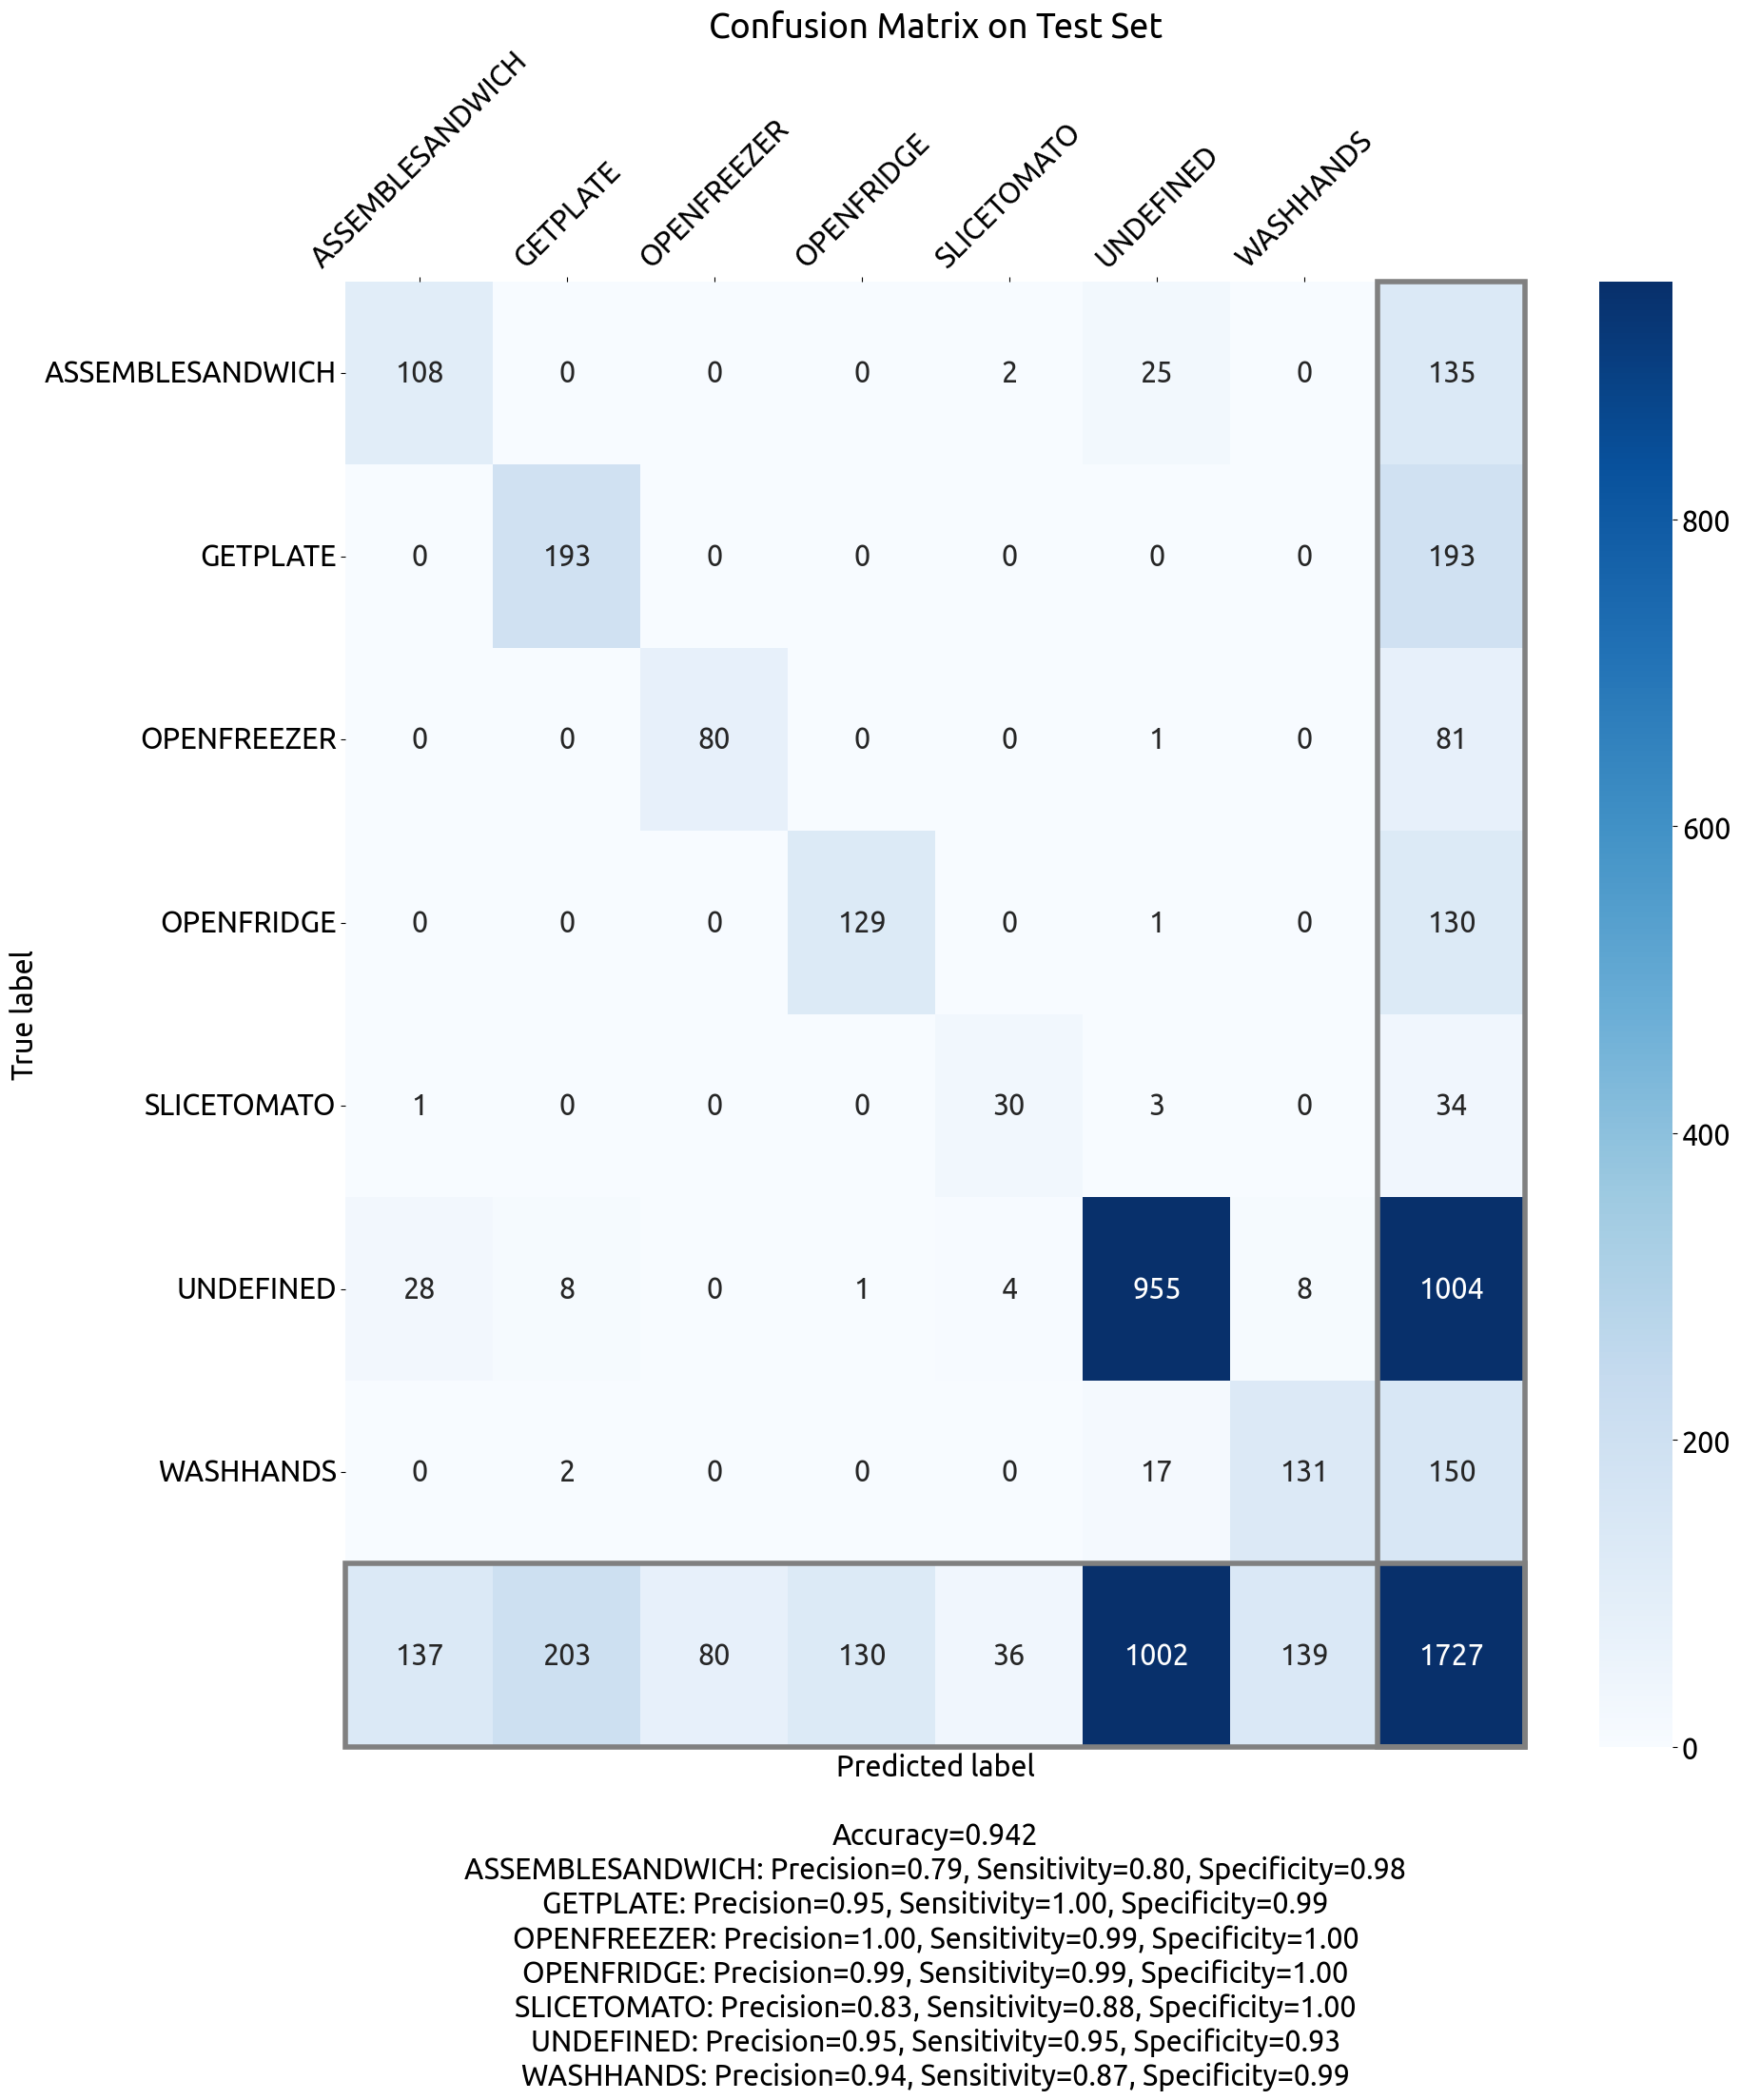

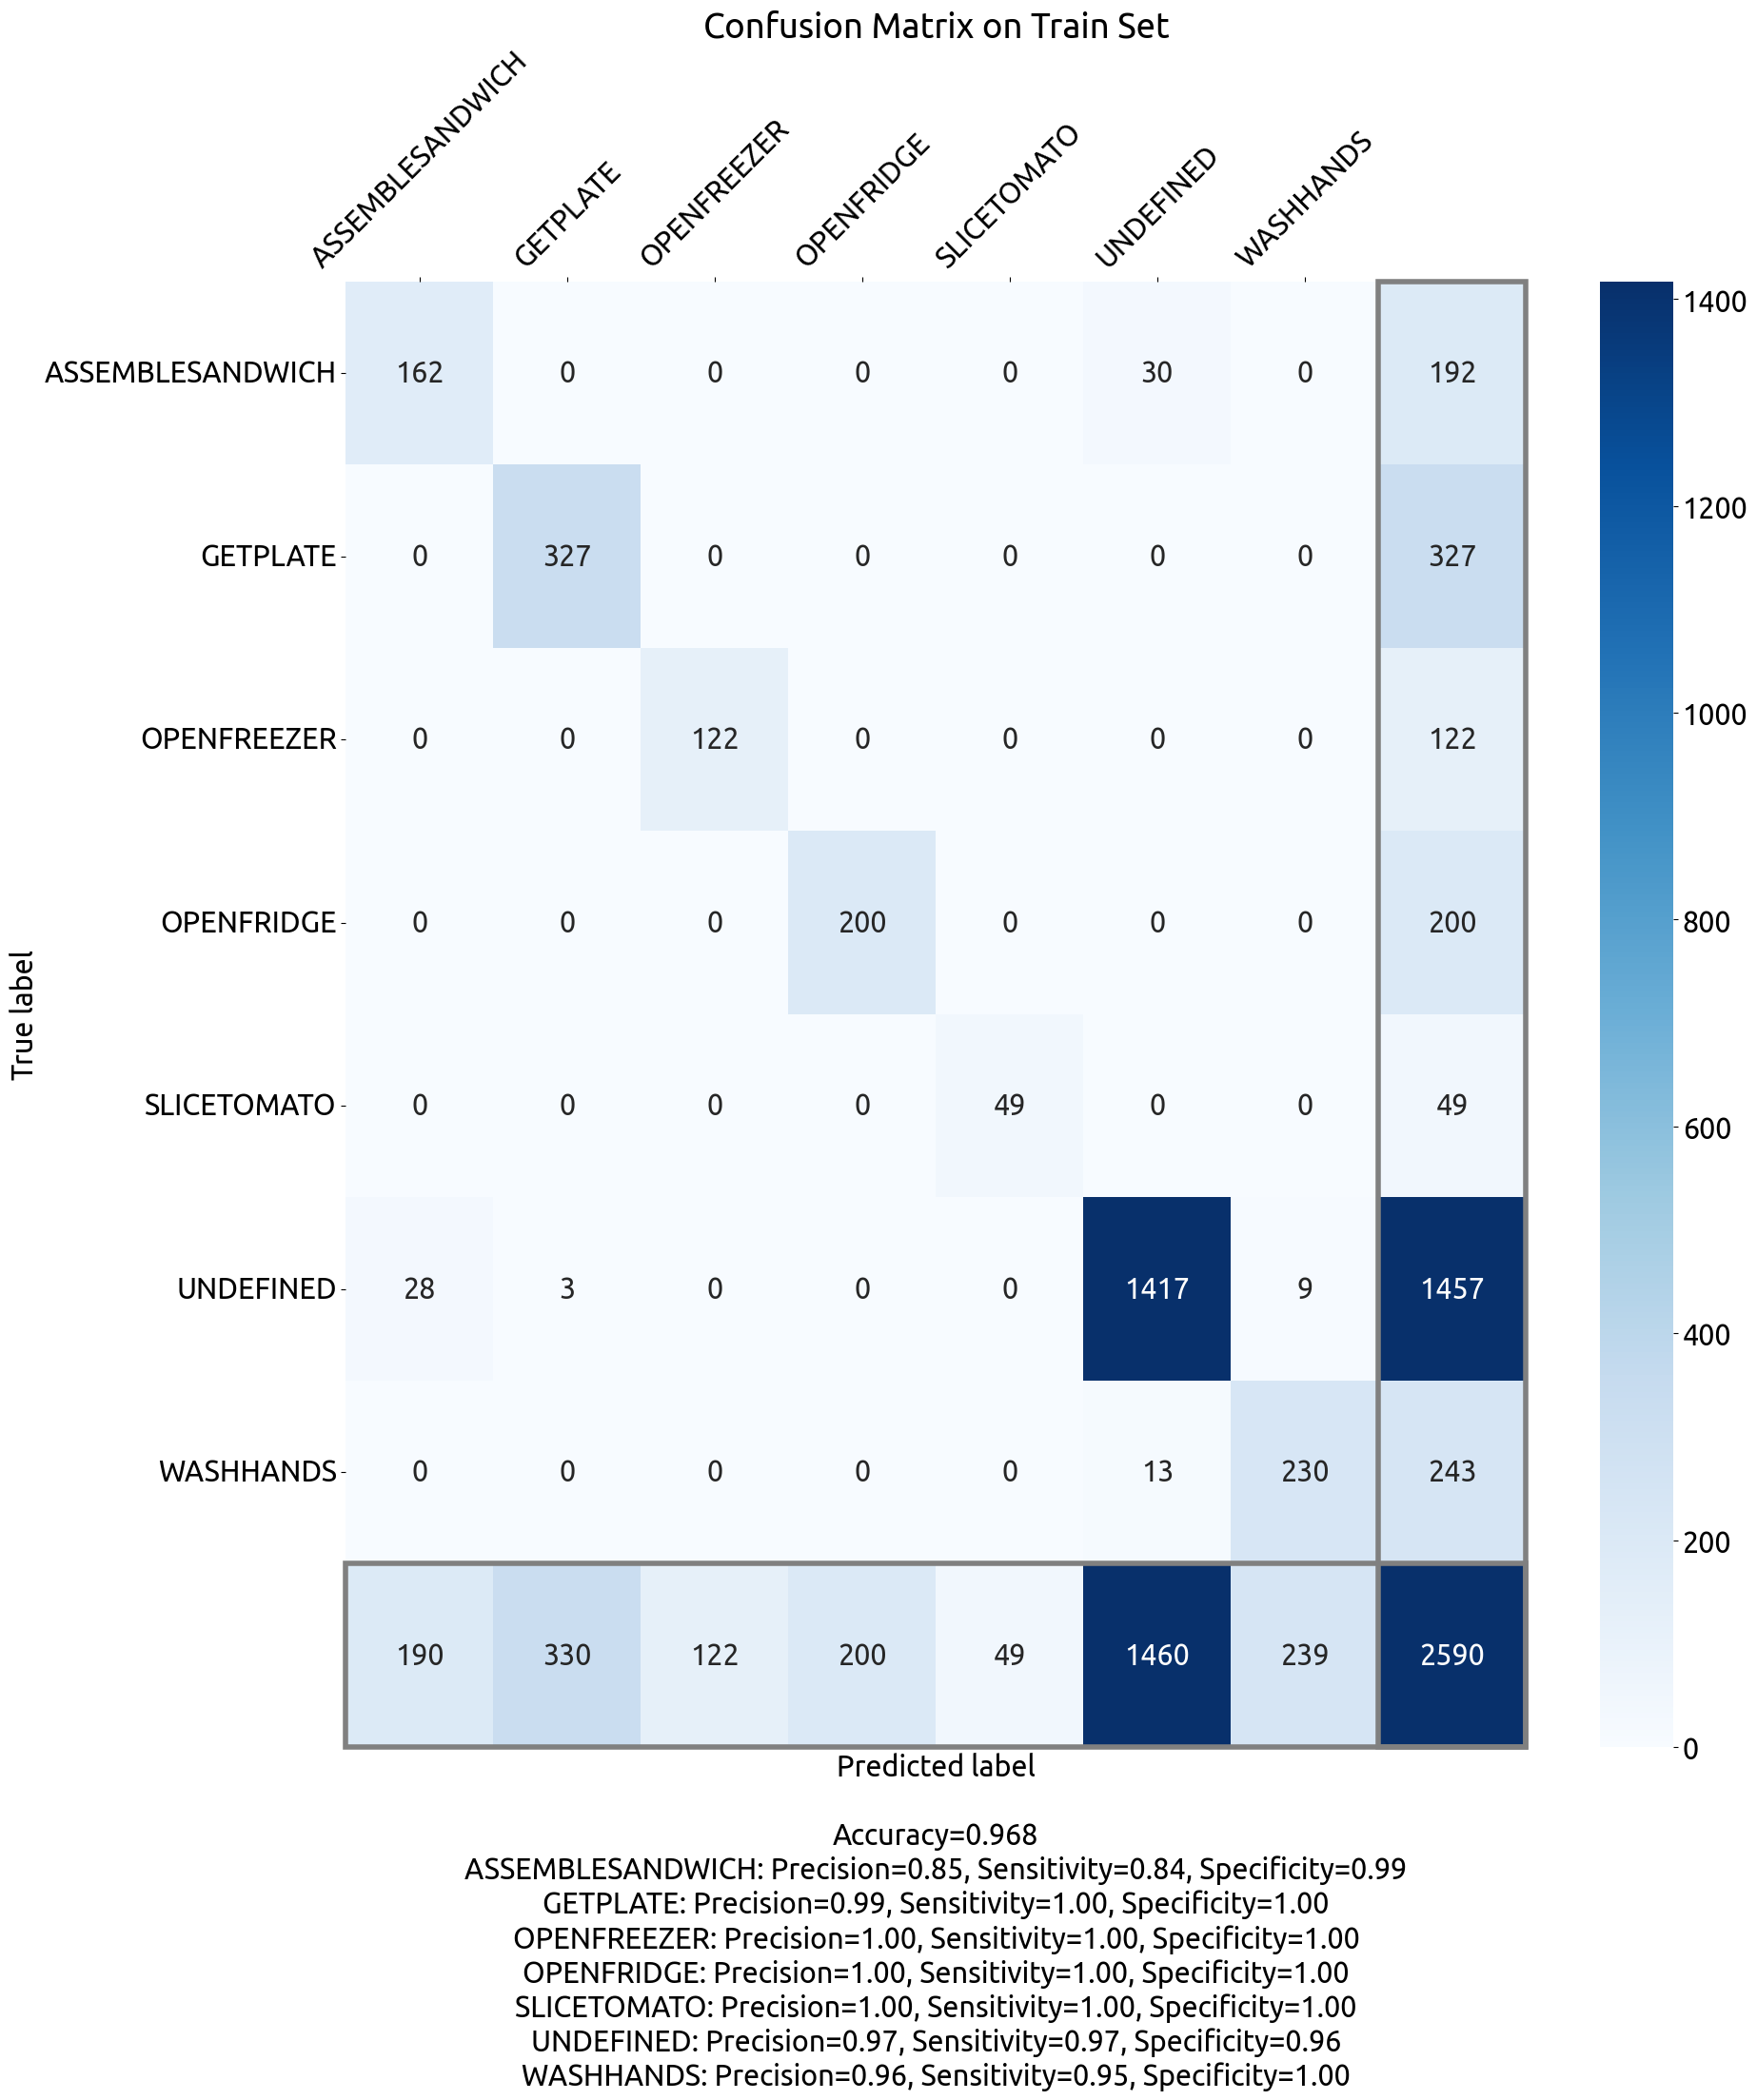

In [10]:
# MARK: - Training
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm, tree
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X = cleaned_data.drop('ACTIVITY', axis=1).values
y = cleaned_data.loc[:, 'ACTIVITY'].values

print("Data Shape: ", X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0
)

print("Train Shape: ", X_train.shape, y_train.shape)
print("Test Shape: ", X_test.shape, y_test.shape)


##################################################
#               MODEL SELECTION

clf = svm.SVC(kernel='linear', C=10) # SVM
# clf = svm.SVC(kernel='poly', degree=3, gamma='scale', C=10) # SVM
# clf = svm.SVC(kernel='rbf', gamma=1000, C=100) # SVM
# clf = tree.DecisionTreeClassifier(random_state=0) # Decision Tree
##################################################

clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred) 
utils.make_confusion_matrix(cf_matrix, categories=categories, figsize=(20,20), percent=False, title="Confusion Matrix on Test Set")

y_pred = clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred) 
utils.make_confusion_matrix(cf_matrix, categories=categories, figsize=(20,20), percent=False, title="Confusion Matrix on Train Set")


# # Plot the tree *** Only for the tree classifier
# plt.figure(figsize=(100,100))
# tree.plot_tree(clf, class_names=categories, feature_names=cleaned_data.drop('ACTIVITY', axis=1).columns)


In [5]:
# Cross Validation
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import f1_score, accuracy_score

# k = 5
# kf = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
# cross_clf = svm.SVC(kernel='linear', C=10)

# accuracy = []

# for train_ind, test_ind in kf.split(X, y):
#     X_train, X_test = X[train_ind], X[test_ind]
#     y_train, y_test = y[train_ind], y[test_ind]

#     print("Shape X_train: ", X_train.shape, " Shape X_test: ", X_test.shape)
#     cross_clf.fit(X_train, y_train)
#     y_pred = cross_clf.predict(X_test)

#     accuracy.append(accuracy_score(y_pred, y_test))

# print(accuracy)



/home/steven/Projects/pozyx-thesis/analysis/utils/utils.py:323: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/(TP+FP)
/home/steven/Projects/pozyx-thesis/analysis/utils/utils.py:324: RuntimeWarning: invalid value encountered in long_scalars
  sensitivity = TP/(TP+FN)


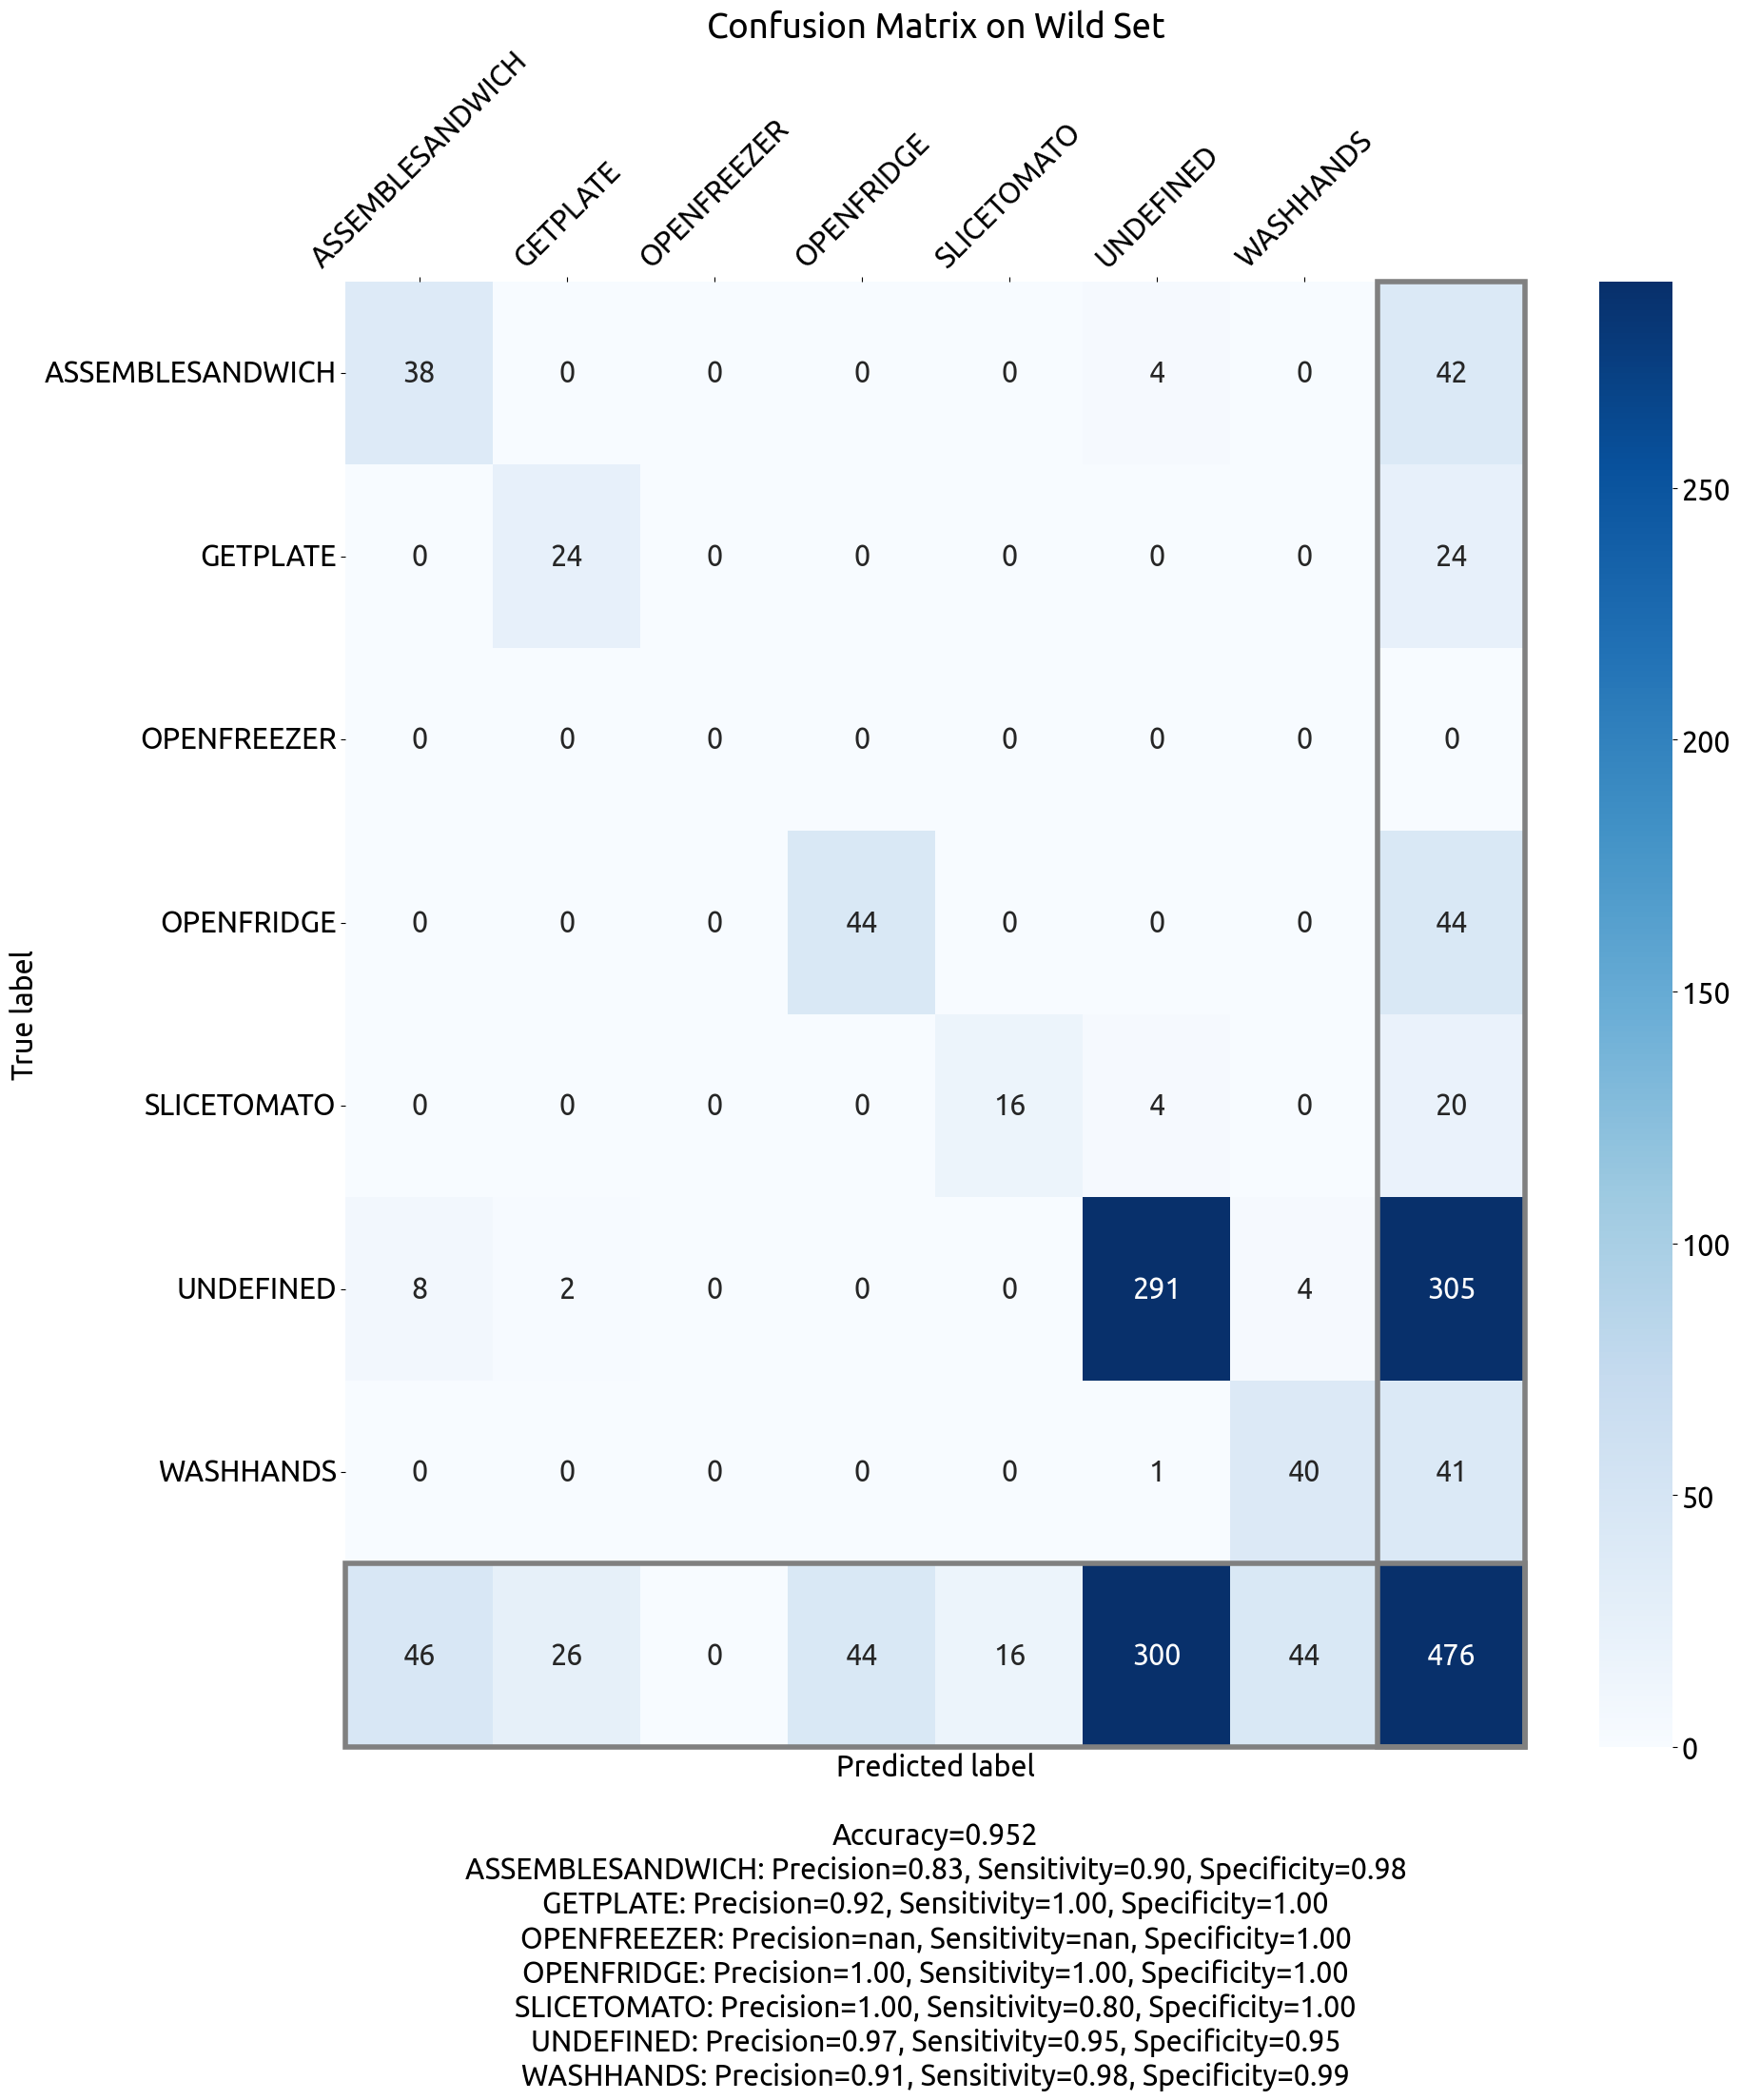

In [6]:
# Test on Wild Data
cleaned_wild = (wild_data
                .dropna()
                .reset_index(drop=True)
                .pipe(utils.one_hot_encode_col, 'LOCATION')
            )
encoded_y = label_encoder.transform(cleaned_wild['ACTIVITY'].values)
cleaned_wild['ACTIVITY'] = encoded_y

X_wild = cleaned_wild.drop('ACTIVITY', axis=1).values
y_wild = cleaned_wild.loc[:, 'ACTIVITY'].values

y_pred = clf.predict(X_wild)
cf_matrix = confusion_matrix(y_wild, y_pred, labels=label_encoder.transform(label_encoder.classes_)) 
utils.make_confusion_matrix(cf_matrix, categories=categories, figsize=(20,20), percent=False, title="Confusion Matrix on Wild Set")

In [7]:
# Test on all data

# clf.predict()

In [7]:
# Export the model
import joblib

joblib.dump(clf, 'output_model.joblib')

['output_model.joblib']